### Wine Quality

Di projek pertama saya ini, saya akan mencoba untuk memprediksi kualitas dari Wine berdasarkan data dari kandungan wine itu sendiri

##### Deskripsi Data

- fixed acidity : sebagian besar asam yang terlibat dengan anggur atau tetap atau tidak mudah menguap
- Volatile Acidity : jumlah asam asetat dalam anggur, yang pada kadarnya terlalu tinggi dapat menyebabkan rasa cuka yang tidak menyenangkan
- Citric Acid : asam sitrat dapat menambah 'kesegaran' dan rasa pada anggur
- Residual Sugar :jumlah gula yang tersisa setelah fermentasi dihentikan
- Chlorides : jumlah garam dalam anggur
- Free Sulfur Dioxide :  bentuk bebas SO2 berada dalam kesetimbangan antara molekul SO2 (sebagai gas terlarut) dan ion bisulfit; itu mencegah pertumbuhan mikroba dan oksidasi anggur
- Total Sulfur Dioxide :  jumlah formulir S02 yang bebas dan terikat; dalam konsentrasi rendah, SO2 sebagian besar tidak terdeteksi dalam anggur, tetapi pada konsentrasi SO2 bebas di atas 50 ppm, SO2 menjadi jelas di hidung dan rasa anggur
- Density : Kepadatan air mendekati air tergantung pada persen kandungan alkohol dan gula
- pH : menjelaskan seberapa asam atau basa anggur dalam skala dari 0 (sangat asam) hingga 14 (sangat basa)
- sulphates : aditif anggur yang dapat berkontribusi pada tingkat gas sulfur dioksida (S02), yang bertindak sebagai antimikroba dan antioksidan
- Alcohol : Kadar alkohol

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Handling Missing Value

In [5]:
df.dropna(subset=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','pH','sulphates'],inplace=True)
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,type,object,0,0.0,2,"[white, red]"
1,fixed acidity,float64,0,0.0,106,"[6.9, 7.5]"
2,volatile acidity,float64,0,0.0,187,"[0.165, 0.33]"
3,citric acid,float64,0,0.0,89,"[0.33, 0.56]"
4,residual sugar,float64,0,0.0,315,"[4.4, 9.25]"
5,chlorides,float64,0,0.0,214,"[0.10400000000000001, 0.204]"
6,free sulfur dioxide,float64,0,0.0,135,"[76.0, 75.0]"
7,total sulfur dioxide,float64,0,0.0,276,"[220.0, 209.0]"
8,density,float64,0,0.0,996,"[0.99105, 0.98975]"
9,pH,float64,0,0.0,108,"[2.87, 3.24]"


### EDA

Kita akan mencoba melihat korelasi antara feature dan target

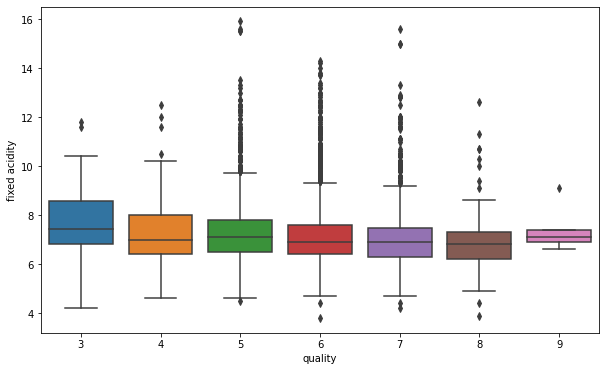

In [6]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'fixed acidity', data = df)

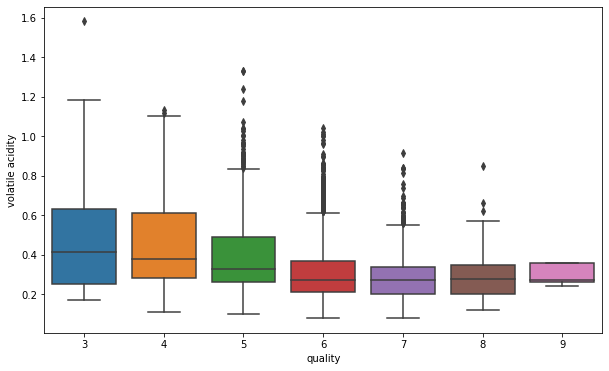

In [7]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'volatile acidity', data = df)

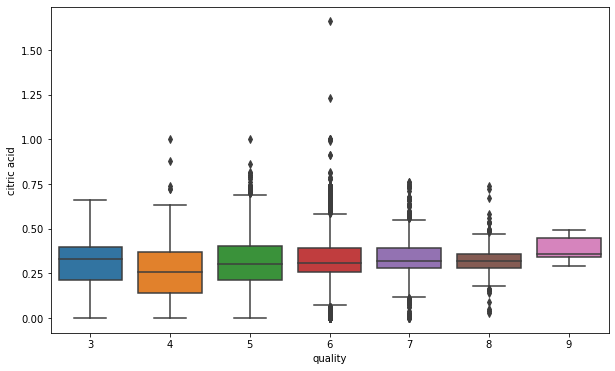

In [8]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'citric acid', data = df)

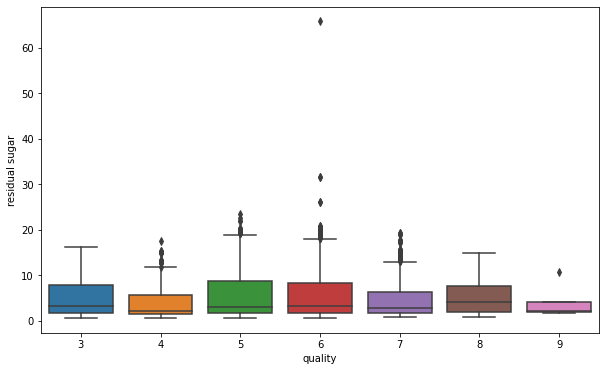

In [9]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'residual sugar', data = df)

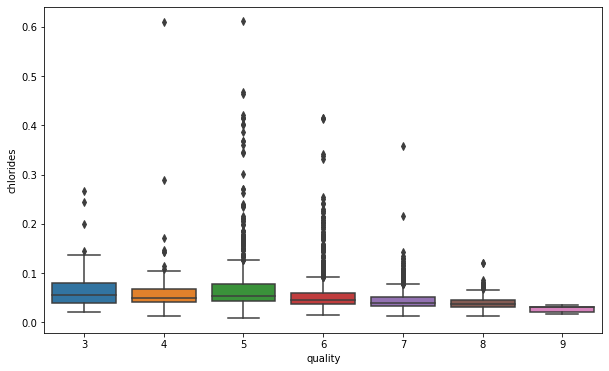

In [10]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'chlorides', data = df)

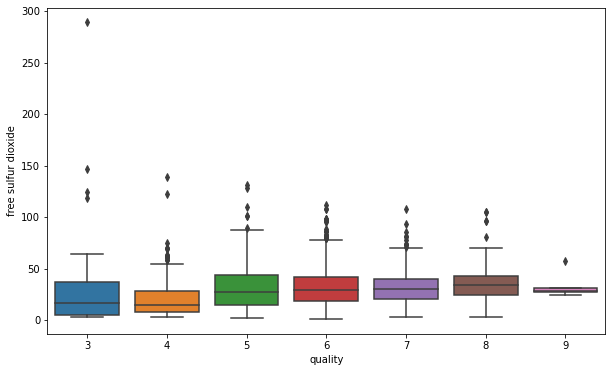

In [11]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'free sulfur dioxide', data = df)

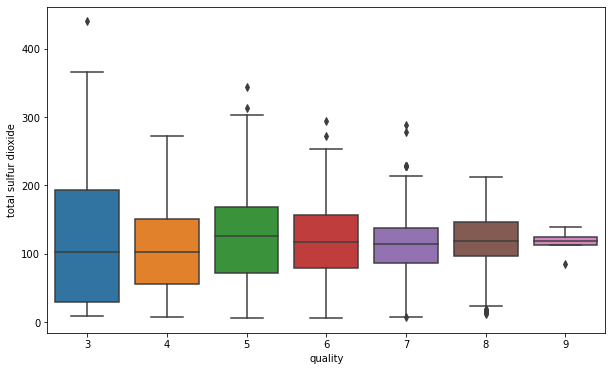

In [12]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'total sulfur dioxide', data = df)

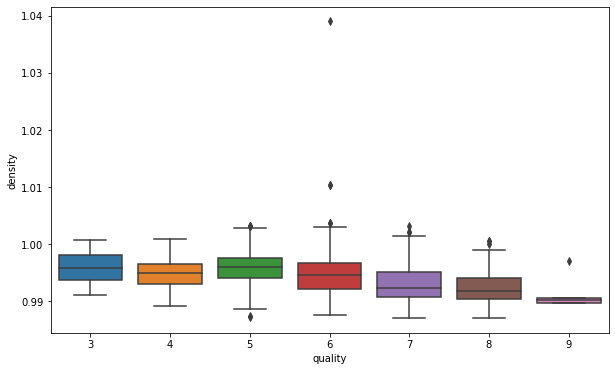

In [13]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'density', data = df)

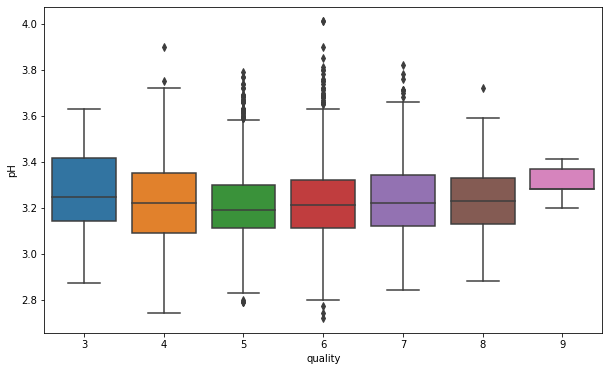

In [14]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'pH', data = df)

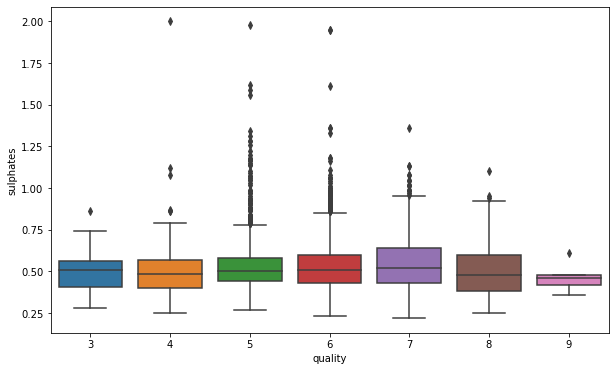

In [15]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'sulphates', data = df)

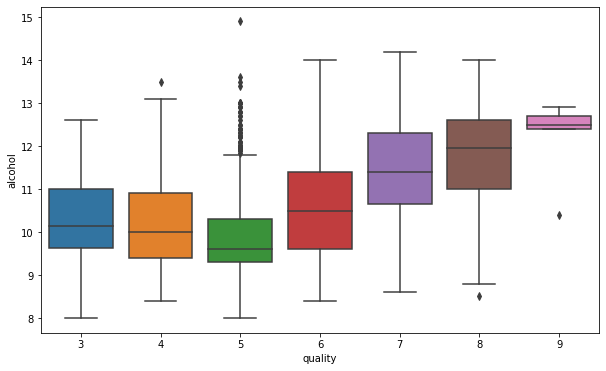

In [16]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'alcohol', data = df)

Dari sini saya melihat terdapat banayak outlier di beberapa kolom dana saya mencoba untuk membuang outlier tersebut

In [17]:
def check_outlier(dataframe, col):
    q1 = dataframe[col].quantile(0.25)
    q3 = dataframe[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    return dataframe[(dataframe[col] < lower_limit) | (dataframe[col] > upper_limit)].index ,upper_limit,lower_limit
id_to_drop,upper,lower = check_outlier(df,'residual sugar')
id_to_drop,upper,lower = check_outlier(df,'free sulfur dioxide')
id_to_drop,upper,lower = check_outlier(df,'total sulfur dioxide')
id_to_drop,upper,lower = check_outlier(df,'volatile acidity')
df.drop(id_to_drop,inplace=True)

In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6089.000000,6089.000000,6089.000000,6089.000000,6089.000000,6089.000000,6089.000000,6089.000000,6089.000000,6089.000000,6089.000000,6089.000000
mean,7.187215,0.312699,0.329447,5.593365,0.054141,31.392183,119.411480,0.994579,3.210507,0.527341,10.507918,5.854327
std,1.291831,0.123753,0.137481,4.767591,0.033183,17.719774,55.017412,0.002964,0.157102,0.147687,1.202518,0.866005
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.220000,0.260000,1.800000,0.037000,18.000000,86.000000,0.992160,3.100000,0.430000,9.500000,5.000000
50%,6.900000,0.280000,0.320000,3.400000,0.046000,29.000000,121.000000,0.994700,3.200000,0.500000,10.400000,6.000000
75%,7.600000,0.380000,0.400000,8.300000,0.060000,42.000000,158.000000,0.996900,3.310000,0.600000,11.300000,6.000000
max,15.900000,0.655000,1.660000,31.600000,0.611000,289.000000,440.000000,1.010300,3.900000,2.000000,14.900000,9.000000


In [19]:
# buat range quality 
bins = (2, 5, 7, 10)
group_names = ['Bad', 'Good', 'Excellent']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [20]:
df['quality'].value_counts()

Good         3773
Bad          2121
Excellent     195
Name: quality, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6089 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   type                  6089 non-null   object  
 1   fixed acidity         6089 non-null   float64 
 2   volatile acidity      6089 non-null   float64 
 3   citric acid           6089 non-null   float64 
 4   residual sugar        6089 non-null   float64 
 5   chlorides             6089 non-null   float64 
 6   free sulfur dioxide   6089 non-null   float64 
 7   total sulfur dioxide  6089 non-null   float64 
 8   density               6089 non-null   float64 
 9   pH                    6089 non-null   float64 
 10  sulphates             6089 non-null   float64 
 11  alcohol               6089 non-null   float64 
 12  quality               6089 non-null   category
dtypes: category(1), float64(11), object(1)
memory usage: 624.5+ KB


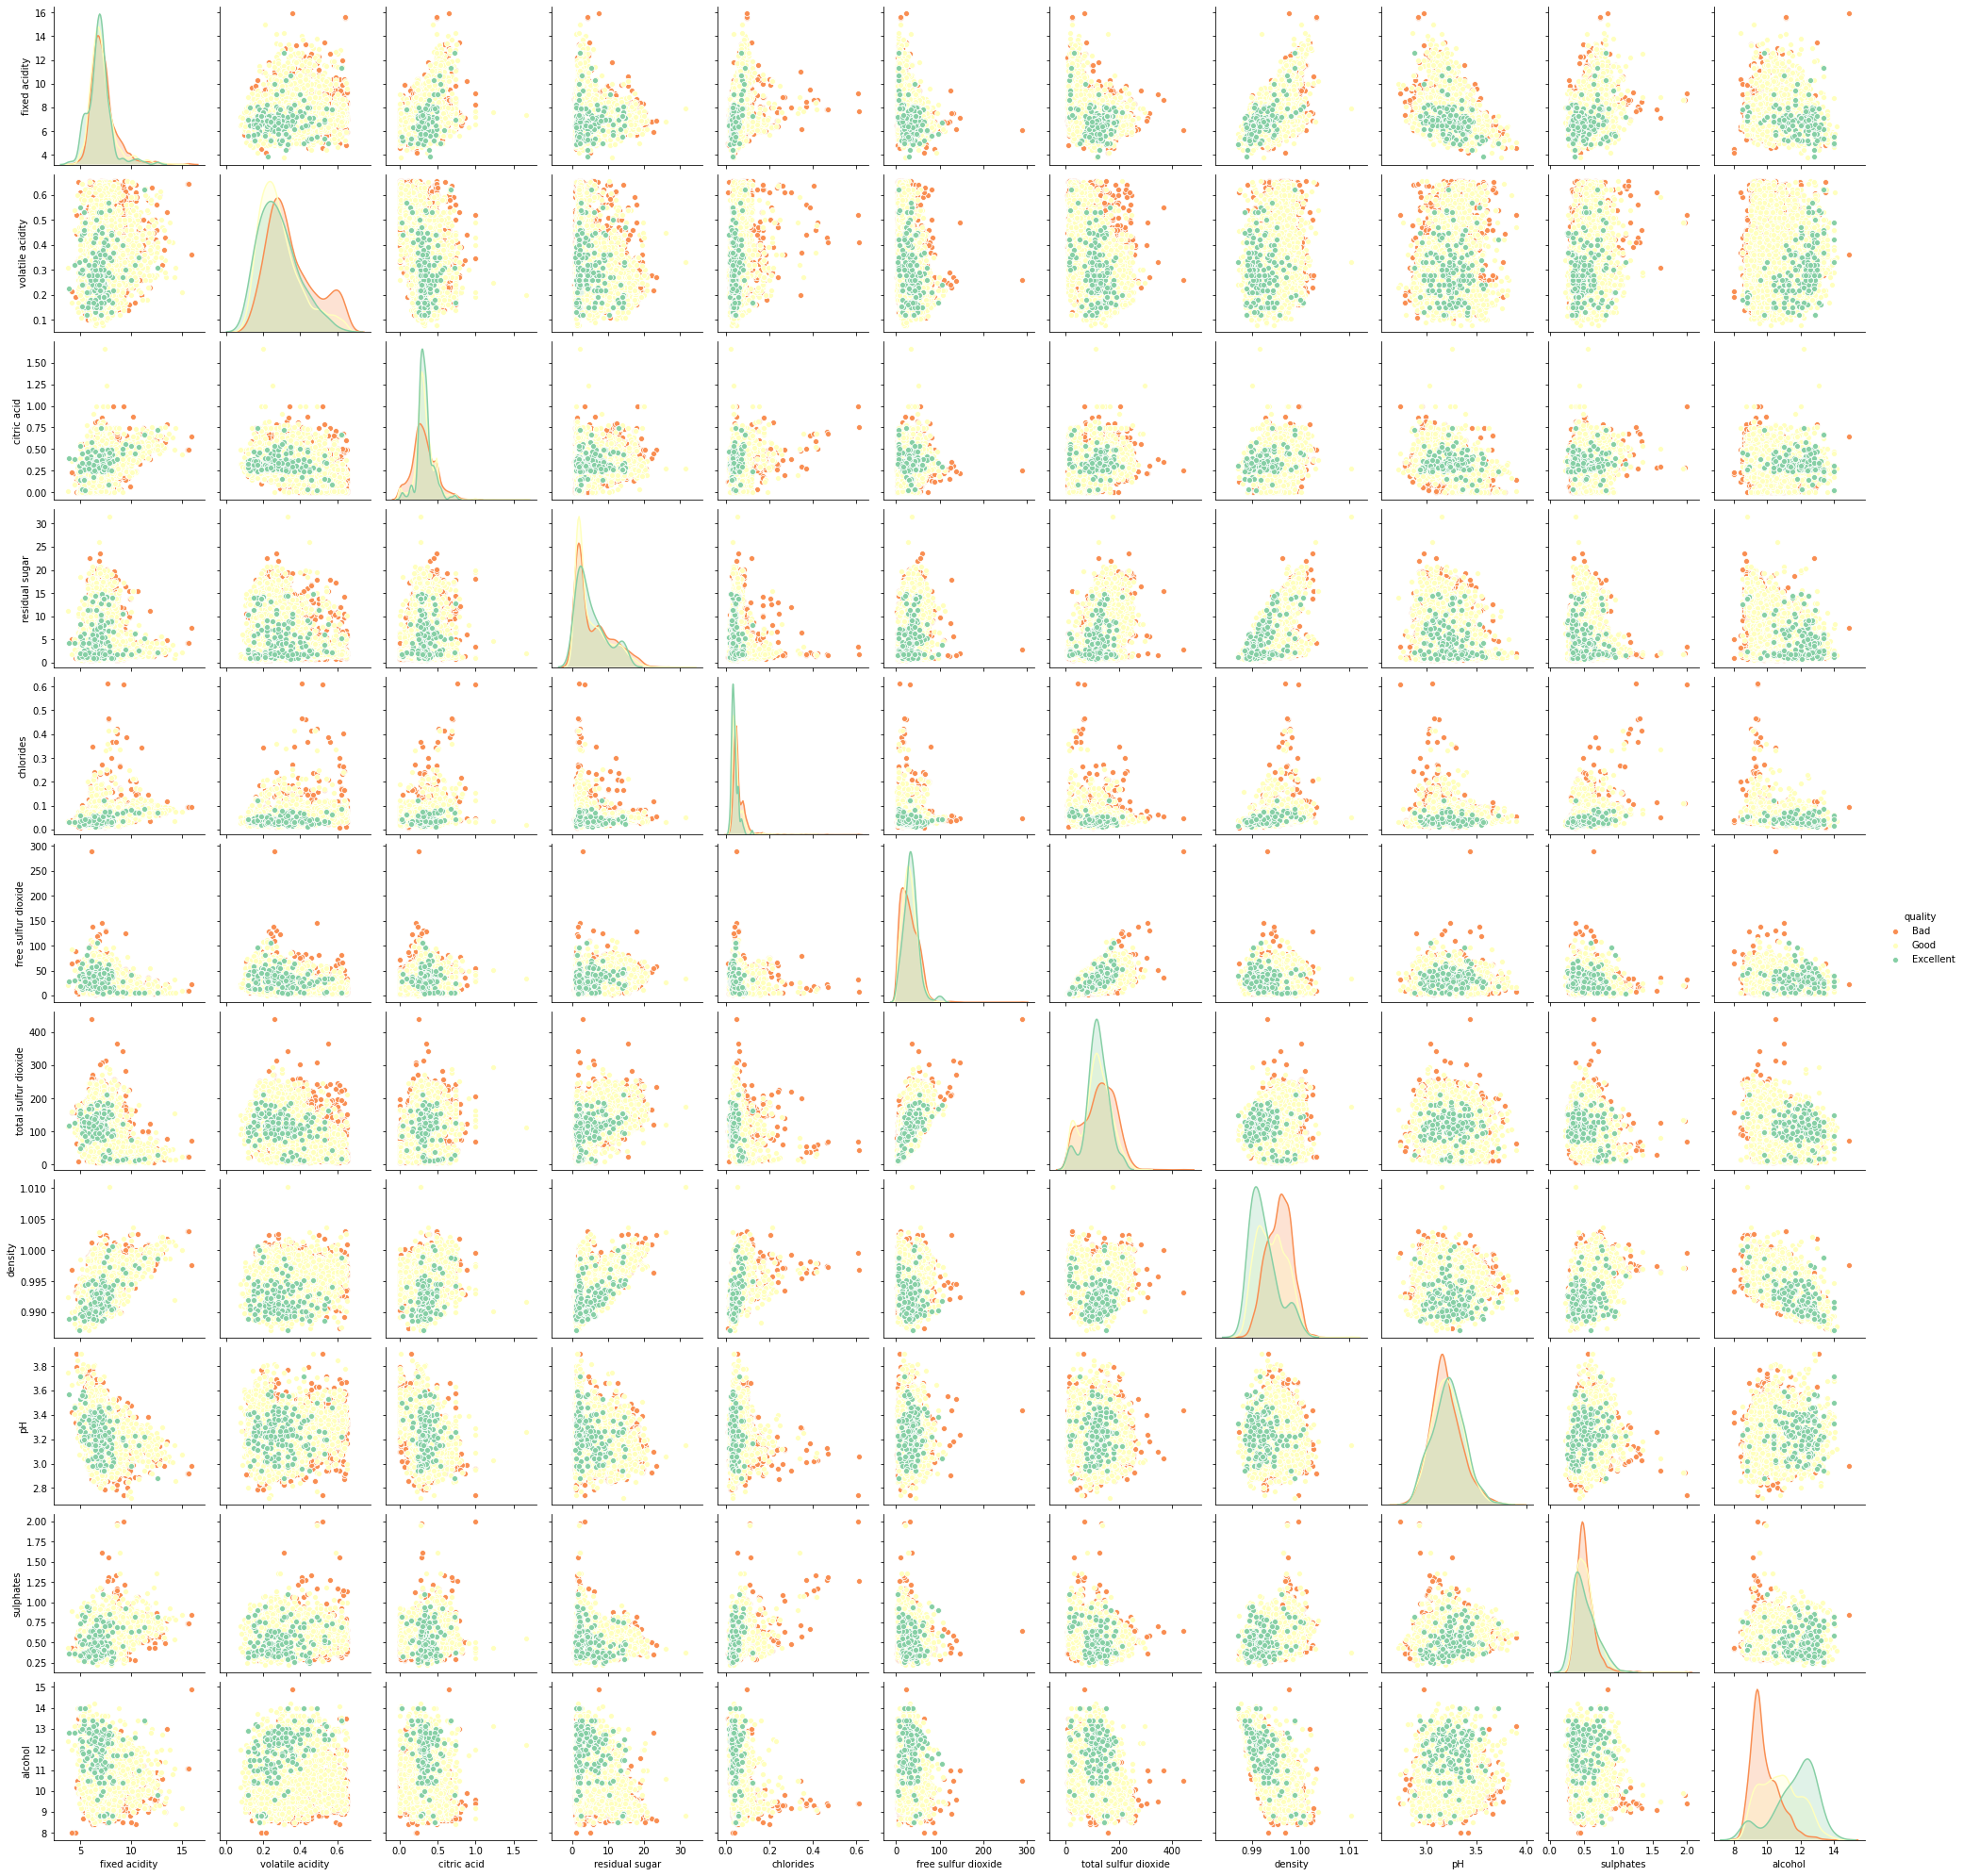

In [22]:
sns.pairplot(df, palette='Spectral', hue='quality')

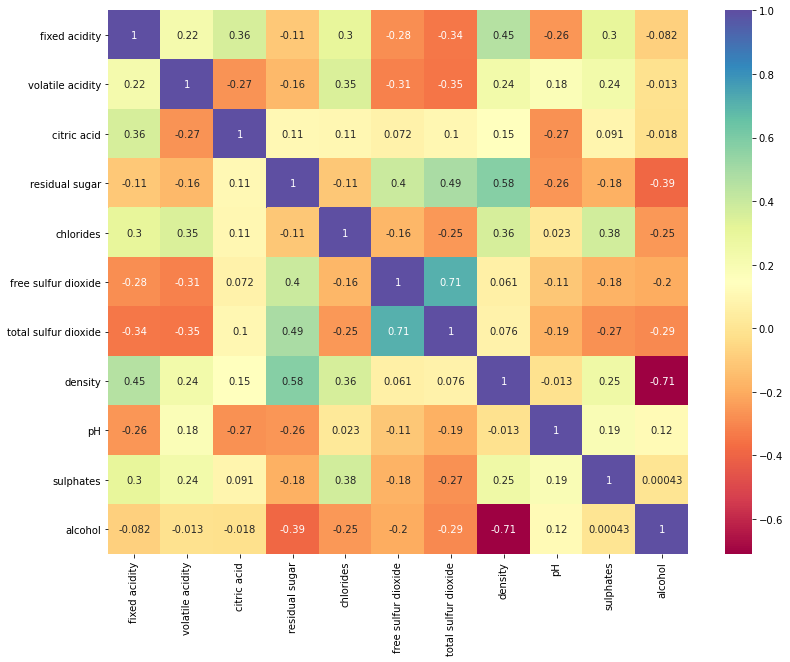

In [23]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, cmap='Spectral')

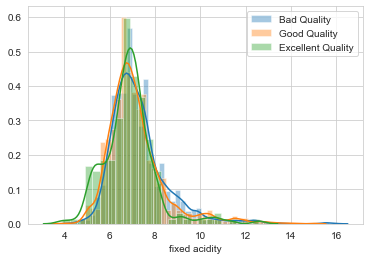

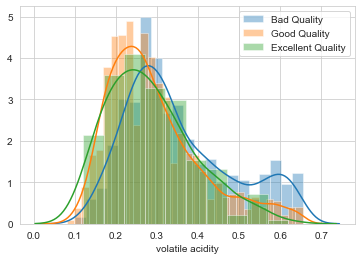

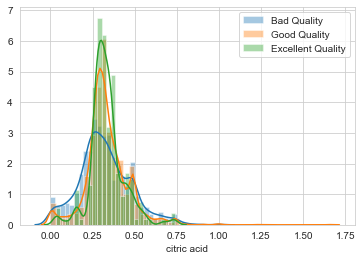

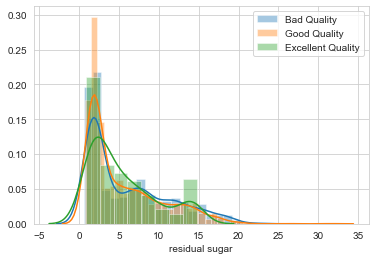

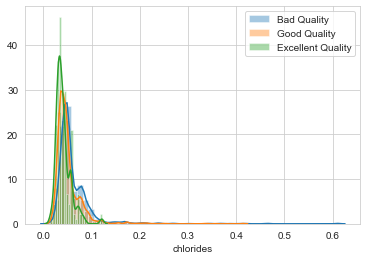

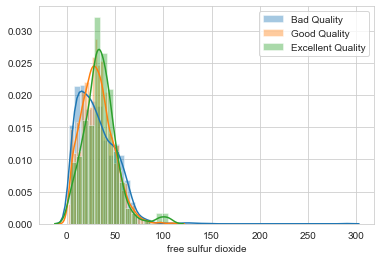

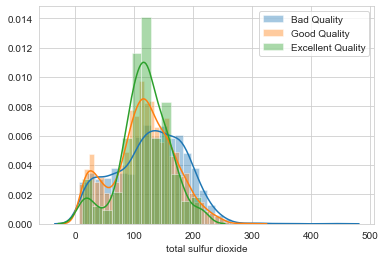

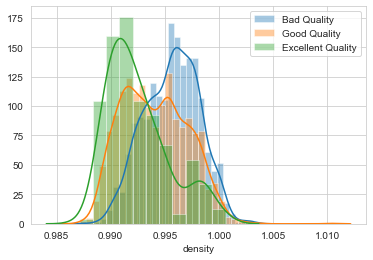

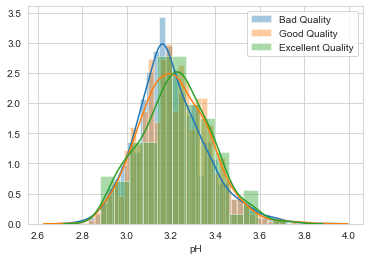

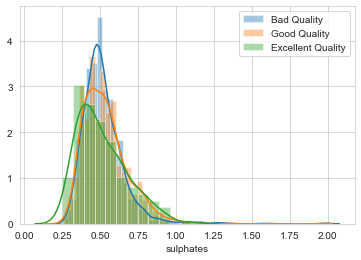

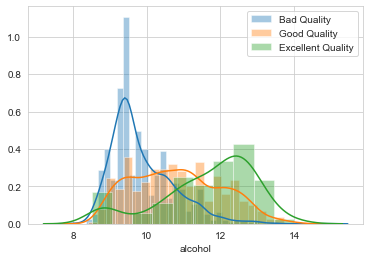

In [24]:
## melihat distribusi dari setiap colom numerical
numerical_columns = df.select_dtypes('number').columns
sns.set_style('whitegrid')
for item in numerical_columns:
    fig, ax = plt.subplots(1,1)
    sns.distplot(df[df['quality']=='Bad'][item],ax=ax, label='Bad Quality')
    sns.distplot(df[df['quality']=='Good'][item], ax=ax, label='Good Quality')
    sns.distplot(df[df['quality']=='Excellent'][item], ax=ax, label='Excellent Quality')
    plt.legend()
    plt.show()

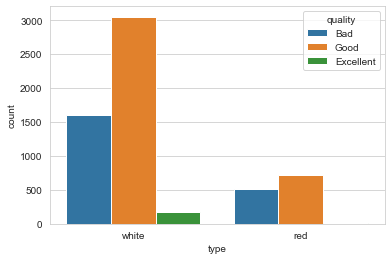

In [25]:
sns.countplot(data=df, x='type', hue='quality')

In [111]:
## Setting Target dan Features
X = pd.get_dummies(df.drop('quality',axis=1), drop_first=True)
# y (target)
y = df['quality']

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=101)

#### DecisionTree Classifier 

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtree = DecisionTreeClassifier(random_state=101)
dtree.fit(X_train,y_train)
pred_train_dtree = dtree.predict(X_train)
pred_test_dtree = dtree.predict(X_test)

In [39]:
## Evaluation for Test Data 
print('====================TEST DATA====================')
print(classification_report(y_test,pred_test_dtree))

====================TEST DATA====================
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       427
           1       0.79      0.79      0.79       754
           2       0.28      0.30      0.29        37

    accuracy                           0.73      1218
   macro avg       0.58      0.59      0.58      1218
weighted avg       0.73      0.73      0.73      1218



In [40]:
## Evaluation for Test Data 
print('====================TRAIN DATA====================')
print(classification_report(y_train,pred_train_dtree))

====================TRAIN DATA====================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1694
           1       1.00      1.00      1.00      3019
           2       1.00      1.00      1.00       158

    accuracy                           1.00      4871
   macro avg       1.00      1.00      1.00      4871
weighted avg       1.00      1.00      1.00      4871



#### Random Forrest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(random_state=101)
rfc.fit(X_train,y_train)
prediction_train_rfc = rfc.predict(X_train)
prediction_test_rfc = rfc.predict(X_test)

In [43]:
## Evaluation for Test Data 
print('====================TEST DATA====================')
print(classification_report(y_test,prediction_test_rfc))

====================TEST DATA====================
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       427
           1       0.81      0.88      0.84       754
           2       0.82      0.24      0.38        37

    accuracy                           0.79      1218
   macro avg       0.80      0.61      0.65      1218
weighted avg       0.79      0.79      0.79      1218



In [44]:
## Evaluation for Test Data 
print('====================TRAIN DATA====================')
print(classification_report(y_train,prediction_train_rfc))

====================TRAIN DATA====================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1694
           1       1.00      1.00      1.00      3019
           2       1.00      1.00      1.00       158

    accuracy                           1.00      4871
   macro avg       1.00      1.00      1.00      4871
weighted avg       1.00      1.00      1.00      4871



#### Gradient Boosting Clasifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
grad = GradientBoostingClassifier(random_state=101)
grad.fit(X_train,y_train)
prediction_train_grad = grad.predict(X_train)
prediction_test_grad = grad.predict(X_test)

In [48]:
## Evaluation for Test Data 
print('====================TEST DATA====================')
print(classification_report(y_test,prediction_test_grad))

====================TEST DATA====================
              precision    recall  f1-score   support

           0       0.66      0.59      0.62       427
           1       0.75      0.82      0.78       754
           2       0.33      0.05      0.09        37

    accuracy                           0.72      1218
   macro avg       0.58      0.49      0.50      1218
weighted avg       0.70      0.72      0.71      1218



In [49]:
## Evaluation for Test Data 
print('====================TRAIN DATA====================')
print(classification_report(y_train,prediction_train_grad))

====================TRAIN DATA====================
              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1694
           1       0.81      0.90      0.85      3019
           2       1.00      0.30      0.46       158

    accuracy                           0.81      4871
   macro avg       0.87      0.63      0.68      4871
weighted avg       0.81      0.81      0.80      4871



#### XGBoost Classifier

In [50]:
from xgboost import XGBClassifier

In [51]:
xgb = XGBClassifier(random_state=101)
xgb.fit(X_train,y_train)
prediction_train_xgb = xgb.predict(X_train)
prediction_test_xgb = xgb.predict(X_test)

In [52]:
## Evaluation for Test Data 
print('====================TEST DATA====================')
print(classification_report(y_test,prediction_test_xgb))

====================TEST DATA====================
              precision    recall  f1-score   support

           0       0.75      0.68      0.72       427
           1       0.80      0.87      0.83       754
           2       0.83      0.27      0.41        37

    accuracy                           0.79      1218
   macro avg       0.80      0.61      0.65      1218
weighted avg       0.79      0.79      0.78      1218



In [53]:
## Evaluation for Test Data 
print('====================TRAIN DATA====================')
print(classification_report(y_train,prediction_train_xgb))

====================TRAIN DATA====================
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1694
           1       0.99      0.99      0.99      3019
           2       1.00      1.00      1.00       158

    accuracy                           0.99      4871
   macro avg       0.99      0.99      0.99      4871
weighted avg       0.99      0.99      0.99      4871



In [56]:
conclusion = pd.DataFrame({'models': ["Dtree","Random Forest","Gradient boosting","XGBoosr"],
                           'accuracies': [accuracy_score(y_test,pred_test_dtree),accuracy_score(y_test,prediction_test_rfc),accuracy_score(y_test,prediction_test_grad),accuracy_score(y_test,prediction_test_xgb)]})
conclusion



,models,accuracies
0,Dtree,0.731527
1,Random Forest,0.794745
2,Gradient boosting,0.718391
3,XGBoosr,0.786535


Setelah Melihat Hasil dari nilai Accuracy masing-masing model yang saya coba, saya akan mencoba untuk melakukan hyperparameter tuning kepada 2 model terbaik yaitu Random Forest Classifier dan XGBoost Classifier

### Using Hyperparameter tuning (GridSearchCV)

In [58]:
from sklearn.model_selection import GridSearchCV

In [73]:
parameters = {
    'n_estimators':[50, 75, 100, 150, 200],
    'min_samples_split': np.arange(2,10),
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_leaf': [1, 2, 4]
}

In [74]:
grid_rfc = GridSearchCV(estimator = rfc,
                        param_grid=parameters,
                        scoring='accuracy',cv=5,n_jobs=-1
                       )


In [75]:
grid_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [50, 75, 100, 150, 200]},
             scoring='accuracy')

In [76]:
grid_rfc.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [77]:
grid_rfc.best_score_

0.8068111409466645

In [86]:
grid_prediction_train_rfc = grid_rfc.predict(X_train)
grid_prediction_test_rfc = grid_rfc.predict(X_test)

In [87]:
## Evaluation for Test Data 
print('====================TEST DATA====================')
print(classification_report(y_test,grid_prediction_test_rfc))

====================TEST DATA====================
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       427
           1       0.81      0.88      0.84       754
           2       0.82      0.24      0.38        37

    accuracy                           0.79      1218
   macro avg       0.80      0.61      0.65      1218
weighted avg       0.79      0.79      0.79      1218



#### XGBoost with GridSearchCV

In [119]:
xgb= XGBClassifier(random_state=101,n_jobs=-1)
parameters = {
    'n_estimators' : [50,75, 100,150,200],
    'max_depth' : [10,20,30,40, 50, 60],
    'learning_rate' : [0.01, 0.05, 0.1, 0.3, 0.5],
}

In [120]:
grid_xgboost = GridSearchCV(estimator=xgb,
                           param_grid = parameters,
                           cv=5, scoring='accuracy',n_jobs=-1
                           )

In [121]:
grid_xgboost.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=101,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [122]:
grid_xgboost.best_score_

0.800447322697836

In [123]:
grid_prediction_train_xgb = grid_xgboost.predict(X_train)
grid_prediction_test_xgb = grid_xgboost.predict(X_test)

In [124]:
## Evaluation for Test Data 
print('====================TEST DATA====================')
print(classification_report(y_test,grid_prediction_test_xgb))

====================TEST DATA====================
              precision    recall  f1-score   support

         Bad       0.77      0.70      0.73       427
   Excellent       0.83      0.27      0.41        37
        Good       0.81      0.88      0.84       754

    accuracy                           0.80      1218
   macro avg       0.80      0.62      0.66      1218
weighted avg       0.80      0.80      0.79      1218



Telah dipastikan Random Forest memiliki nilai yang lebih baik dan saya memilih model Random Forest untuk memprediksi dengan menggunakan dataset yang saya miliki

In [154]:
Quality = pd.DataFrame(rfc.feature_importances_, columns=['quality'])
Quality['Column'] = X.columns
Quality

,quality,Column
0,0.070916,fixed acidity
1,0.107166,volatile acidity
2,0.078842,citric acid
3,0.078834,residual sugar
4,0.080789,chlorides
5,0.086441,free sulfur dioxide
6,0.089351,total sulfur dioxide
7,0.098528,density
8,0.076505,pH
9,0.080436,sulphates


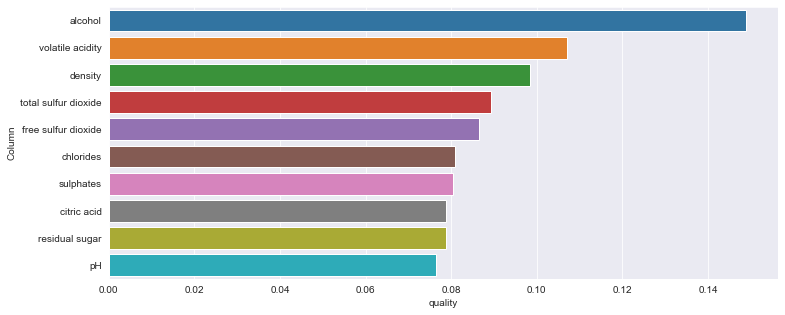

In [155]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.barplot(data=Quality.sort_values(by=['quality'],ascending=False).head(10),x='quality',y='Column')
plt.show()

### Export Model

In [147]:
import pickle

In [148]:
filename = 'finalized_model.sav'
pickle.dump(grid_rfc, open(filename, 'wb'))

In [149]:
filename = 'x_dummies_colomn.sav'
pickle.dump(X.columns, open(filename , 'wb'))

In [150]:
model = pickle.load(open('finalized_model.sav','rb'))
one_hot_columns = pickle.load(open('x_dummies_colomn.sav','rb'))

In [110]:
def prediction(data):
    df = pd.DataFrame(data,index=[0])
    df = pd.get_dummies(df)
    df = df.reindex(columns=one_hot_columns, )
    hasil = model.predict(df)
    return round(hasil[0])

In [138]:
df_x= pd.DataFrame(inputan,index=[0])
df_x= pd.get_dummies(df_x)

In [139]:
df_x

,Fixed Acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,6.8,0.26,0.42,1.7,0.049,41,122,0.993,3.47,0.48,10.5,1


In [135]:
inputan = {'type': 'white', 'Fixed Acidity': 6.8, 'volatile acidity': 0.26, 
           'citric acid': 0.42, 'residual sugar': 1.7, 'chlorides': 0.049,
          'free sulfur dioxide':41, 'total sulfur dioxide':122,'density':0.993, 'pH':3.47,
          'sulphates':0.48, 'alcohol':10.5}

In [140]:
hasil = model.predict(df_x)

In [151]:
hasil[0]

2

In [142]:
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [50, 75, 100, 150, 200]},
             scoring='accuracy')